In [5]:
import seaborn as sns
from statsmodels.stats.weightstats import ztest as ztest


In [6]:

kash = sns.load_dataset("titanic")
kash.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
ztest(kash['fare'],kash['age'])

(nan, nan)

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   
import seaborn as sns
import scipy.stats as st

In [ ]:
import os
for dirname, _, filenames in os.walk('D:/pythonchilla/SartajAhmedPythokChilla/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [16]:
pima_df = pd.read_csv("diabetes.csv")

In [17]:
pima_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
#Shape of the data
pima_df.shape

(768, 9)

In [19]:
#Checking for the info of the dataset

pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
#Lets analysze the distribution of the various attributes
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [21]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of 
# a number.

# we use np.isreal a numpy function which checks each column for each row and returns a bool array, 
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function columnwise
# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

pima_df[~pima_df.applymap(np.isreal).all(1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [22]:
#There are 0 values in the dataset in the Glucose,BloodPressure,SkinThickness, Insulin and BMI, we need to replace them with the NAN 

pima_df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=pima_df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0, np.NaN)

In [23]:
pima_df.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [24]:
#Checking for the missing values in the dataset

pima_df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [25]:
#Replacing the null values with the mean and median respectively

pima_df['Glucose'].fillna(pima_df['Glucose'].mean(), inplace = True)
pima_df['BloodPressure'].fillna(pima_df['BloodPressure'].mean(),inplace=True)
pima_df['SkinThickness'].fillna(pima_df['SkinThickness'].median(),inplace=True)
pima_df['Insulin'].fillna(pima_df['Insulin'].median(),inplace=True)
pima_df['BMI'].fillna(pima_df['BMI'].median(),inplace=True)

In [26]:
#Convert the target column to a categorical variable
pima_df['Outcome']=pima_df['Outcome'].astype('category')

C:\Users\Sartaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

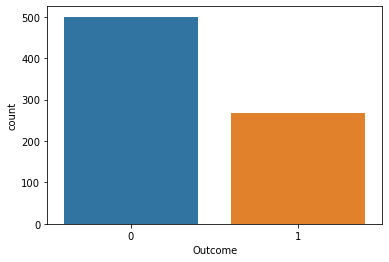

In [27]:
#Distribution of the target class

sns.countplot(pima_df['Outcome'])
#pima_df['Outcome'].value_counts(normalize=True).plt()

In [28]:
pima_df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [29]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
pima_df.groupby(["Outcome"]).mean() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.710121,70.935397,27.726000,127.792000,30.885600,0.429734,31.190000
1,4.865672,142.165573,75.147324,31.686567,164.701493,35.383582,0.550500,37.067164


In [30]:
    
# Required population parameters and sample statistic
import scipy.stats as st
Mu = 72.4  
Std = 12.09

sample_avg_bp = np.average(pima_df['BloodPressure'])
std_error_bp = Std / np.sqrt(pima_df.size) # Standard dev of the sampling mean distribution... estimated from population
print("Sample Avg BP : " , sample_avg_bp)
print("Standard Error: " , std_error_bp)

# Z_norm_deviate =  sample_mean - population_mean / std_error_bp

Z_norm_deviate = (sample_avg_bp - Mu) / std_error_bp
print("Normal Deviate Z value :" , Z_norm_deviate)

p_value = st.norm.sf(abs(Z_norm_deviate))*2 #twosided using sf - Survival Function
print('p values' , p_value)

if p_value > 0.05:
	print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
	print('Samples are likely drawn from different distributions (reject H0)')

Sample Avg BP :  72.40518417462482
Standard Error:  0.145420099052137
Normal Deviate Z value : 0.035649643059018486
p values 0.9715617240194679
Samples are likely drawn from the same distributions (fail to reject H0)


In [31]:
# used when the two requirements of normal deviate Z test cannot be met i.e. when the population mean and standard deviation
# is unknown

Mu = 72.4   
# Std = ?  Population standard deviatin is unknown

x = pima_df['BloodPressure']  # Storing values in a list to avoid long names
est_pop_std = np.sqrt(np.sum(abs(x - x.mean())**2) / (pima_df.size - 1))     #  sqrt(sum(xi - Xbar)^2 / (n -1))

sample_avg_bp =(pima_df['BloodPressure']).mean()

std_error_bp = est_pop_std / np.sqrt(pima_df.size) # Standard dev of the sampling mean distribution... estimated from population

T_Statistic = (( sample_avg_bp - Mu) / std_error_bp)

pvalue = st.t.sf(np.abs(T_Statistic), pima_df.size-1)*2
print("Estimated Pop Stand Dev" , est_pop_std)
print("Sample Avg BP : " , sample_avg_bp)
print("Standard Error: " , std_error_bp)
print("T Statistic" , T_Statistic)
print("Pval" , pvalue)

if pvalue > 0.05:
	print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
	print('Samples are likely drawn from different distributions (reject H0)')

Estimated Pop Stand Dev 4.029780981170755
Sample Avg BP :  72.40518417462486
Standard Error:  0.048470731963628534
T Statistic 0.10695474185841736
Pval 0.9148279889570085
Samples are likely drawn from the same distributions (fail to reject H0)


In [32]:
# Tests whether the means of two independent samples are significantly different.

# Pima Indians Dataset has many missing values in multiple columns. Let us replace the missing values with median. Does this
# step of handling missing values modify the distribution so much that statistically it is no more equivalent of original data?

pima_df_mod = pima_df.copy()


pima_df_mod['BloodPressure'] = pima_df_mod['BloodPressure'].mask(pima_df['BloodPressure'] == 0,pima_df['BloodPressure'].median())

In [33]:
from scipy.stats import ttest_ind

stat, pvalue = ttest_ind(pima_df_mod['BloodPressure'] , pima_df['BloodPressure'])
print("compare means", pima_df_mod['BloodPressure'].mean() , pima_df['BloodPressure'].mean())
print("Tstatistic , Pvalue", stat, pvalue)

if pvalue > 0.05:
	print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
	print('Samples are likely drawn from different distributions (reject H0)')

compare means 72.40518417462486 72.40518417462486
Tstatistic , Pvalue 0.0 1.0
Samples are likely drawn from the same distributions (fail to reject H0)
